In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

<AxesSubplot:>

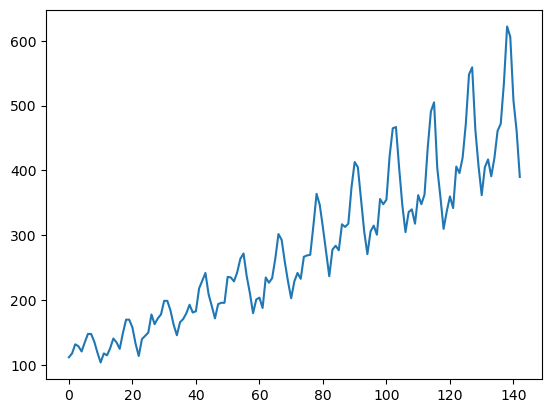

In [2]:
# dados dos passageiros
from pmdarima.datasets import load_airpassengers

series = load_airpassengers(as_series=True)[:-1]

series.plot()

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(series, shuffle=False, test_size=12)

train.tail()

126    548.0
127    559.0
128    463.0
129    407.0
130    362.0
dtype: float64

In [4]:
test

131    405.0
132    417.0
133    391.0
134    419.0
135    461.0
136    472.0
137    535.0
138    622.0
139    606.0
140    508.0
141    461.0
142    390.0
dtype: float64

In [5]:
import pmdarima as pm

model = pm.auto_arima(train, m=12, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=896.405, Time=6.84 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1009.587, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=896.831, Time=0.60 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=953.101, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1179.879, Time=0.05 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=896.568, Time=1.66 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=896.398, Time=2.16 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=895.444, Time=0.95 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=894.320, Time=0.63 sec
 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=894.944, Time=1.99 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=895.147, Time=1.03 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.44 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=916.286, Time=0.33 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=896.559, Time=0.31 sec
 ARIMA(1,0,3)(0,1,0)[12] intercept 

In [6]:
forecasts, pred_interval = model.predict(n_periods=len(test), return_conf_int=True, alpha=0.05)
forecasts

131    381.537570
132    402.365378
133    380.863320
134    442.324442
135    430.483838
136    453.149460
137    504.182080
138    579.480760
139    589.972326
140    493.603728
141    437.336507
142    392.142780
dtype: float64

In [7]:
pred_interval

array([[362.14836034, 400.92678003],
       [378.3751639 , 426.35559137],
       [352.39448686, 409.33215289],
       [411.76375051, 472.88513338],
       [398.87917145, 462.08850465],
       [421.00969543, 485.28922478],
       [471.76461999, 536.59953903],
       [546.91829969, 612.04322042],
       [557.33391494, 622.61073761],
       [460.92546961, 526.28198703],
       [404.63732465, 470.03568894],
       [359.43260622, 424.85295355]])

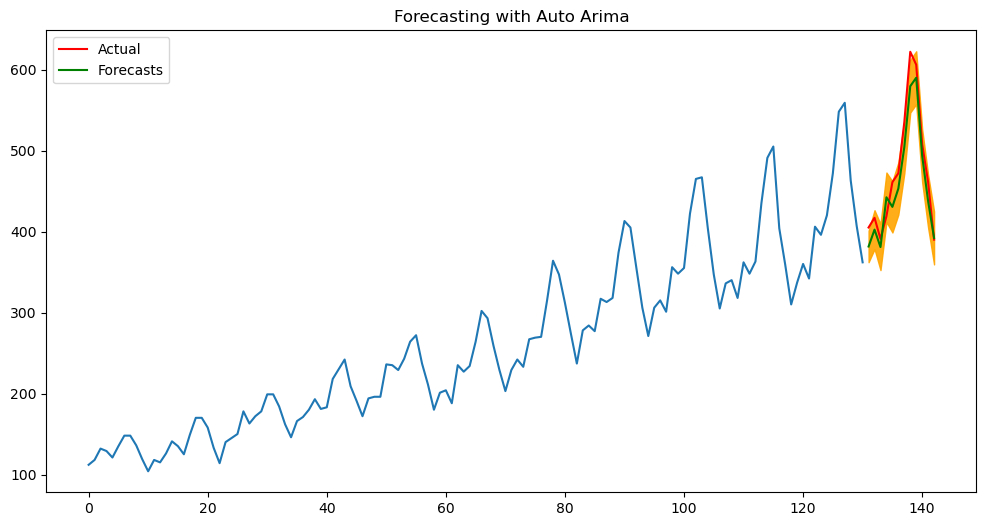

In [8]:
test = test.rename('Actual')
forecasts = pd.Series(forecasts, index=test.index).rename('Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with Auto Arima')
forecasts.plot(legend=True, color='green')
ax.fill_between(test.index,
                pred_interval[:, 0], 
                pred_interval[:, 1],
                alpha=0.9, color='orange',
                label="Prediction Intervals")

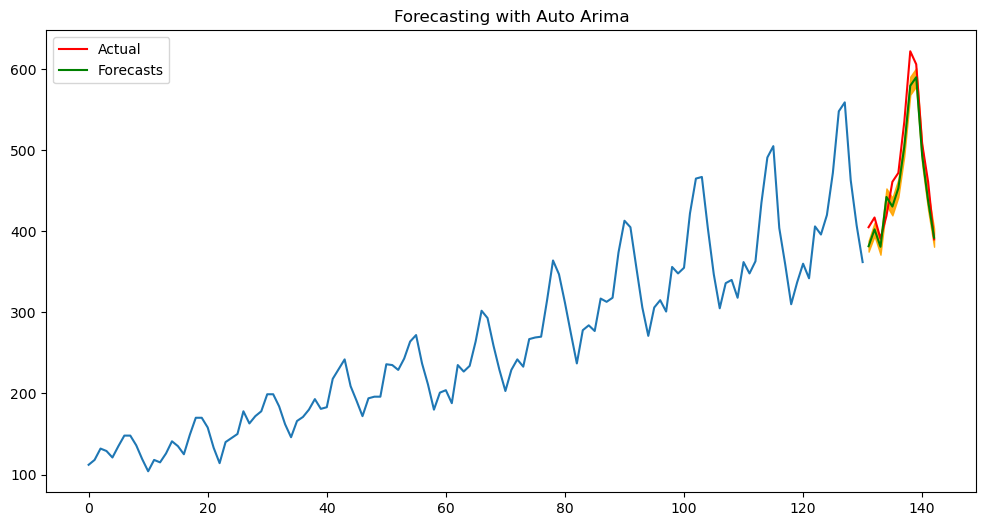

In [9]:
forecasts, pred_interval = model.predict(n_periods=len(test), return_conf_int=True, alpha=0.5)

test = test.rename('Actual')
forecasts = pd.Series(forecasts, index=test.index).rename('Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with Auto Arima')
forecasts.plot(legend=True, color='green')
ax.fill_between(test.index,
                pred_interval[:, 0], 
                pred_interval[:, 1],
                alpha=0.9, color='orange',
                label="Prediction Intervals")

# Previsão de Excedência

In [10]:
data = pd.read_csv('assets/wave_height_hourly.csv')

In [11]:
data.head()

,time,SignificantWaveHeight
0,2016-01-01 00:00:00,6.085000
1,2016-01-01 01:00:00,5.989611
2,2016-01-01 02:00:00,5.494222
3,2016-01-01 03:00:00,5.170778
4,2016-01-01 04:00:00,5.362333


<AxesSubplot:xlabel='time'>

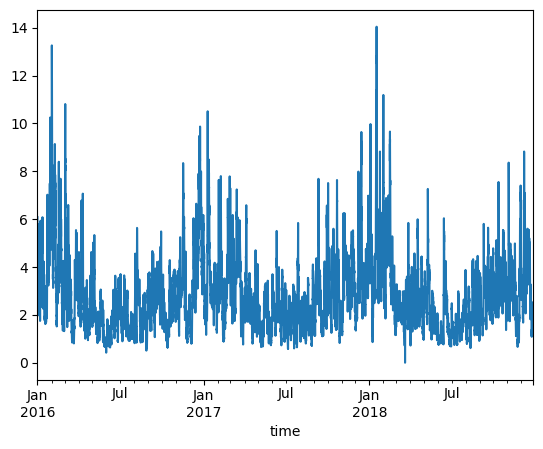

In [12]:
wave = pd.Series(data['SignificantWaveHeight'].values, index = pd.to_datetime(data['time']))
wave.plot()

In [13]:
from src.tde import UnivariateTDE

wave_tde = UnivariateTDE(wave, horizon=12, k=6)
wave_tde.head()

,t-5,t-4,t-3,t-2,t-1,t-0,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
0,6.085000,5.989611,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833
1,5.989611,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778
2,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778,4.292167
3,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778,4.292167,4.547722
4,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778,4.292167,4.547722,4.524944


In [14]:
is_future = wave_tde.columns.str.contains('\+')
X = wave_tde.iloc[:,~is_future]
y = wave_tde['t+12']

X.head()

,t-5,t-4,t-3,t-2,t-1,t-0
0,6.085000,5.989611,5.494222,5.170778,5.362333,4.876556
1,5.989611,5.494222,5.170778,5.362333,4.876556,5.110222
2,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111
3,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167
4,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167


In [15]:
y

0        4.598833
1        4.137778
2        4.292167
3        4.547722
4        4.524944
           ...   
26197    2.173500
26198    2.061556
26199    2.029222
26200    2.061222
26201    2.007000
Name: t+12, Length: 26202, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [17]:
y_train.describe()

count    18341.000000
mean         2.872670
std          1.614961
min          0.422286
25%          1.721278
50%          2.542500
75%          3.596222
max         14.044647
Name: t+12, dtype: float64

In [18]:
threshold = y_train.quantile(0.95)
threshold

6.070277777777778

In [19]:
y_train_clf = (y_train > threshold).astype(int)
y_train_clf

0        0
1        0
2        0
3        0
4        0
        ..
18336    0
18337    0
18338    0
18339    0
18340    0
Name: t+12, Length: 18341, dtype: int64

In [20]:
y_train_clf.value_counts(normalize=True)

0    0.950057
1    0.049943
Name: t+12, dtype: float64

In [21]:
y_test_clf = (y_test > threshold).astype(int)
y_test_clf.value_counts(normalize=True)

0    0.977484
1    0.022516
Name: t+12, dtype: float64

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train_clf)

RandomForestClassifier()

In [23]:
forecasts_prob = model.predict_proba(X_test)
forecasts_prob

array([[0.64, 0.36],
       [0.82, 0.18],
       [0.67, 0.33],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [24]:
exceedance_prob = forecasts_prob[:,1]
exceedance_prob[:6]

array([0.36, 0.18, 0.33, 0.29, 0.38, 0.27])

<AxesSubplot:>

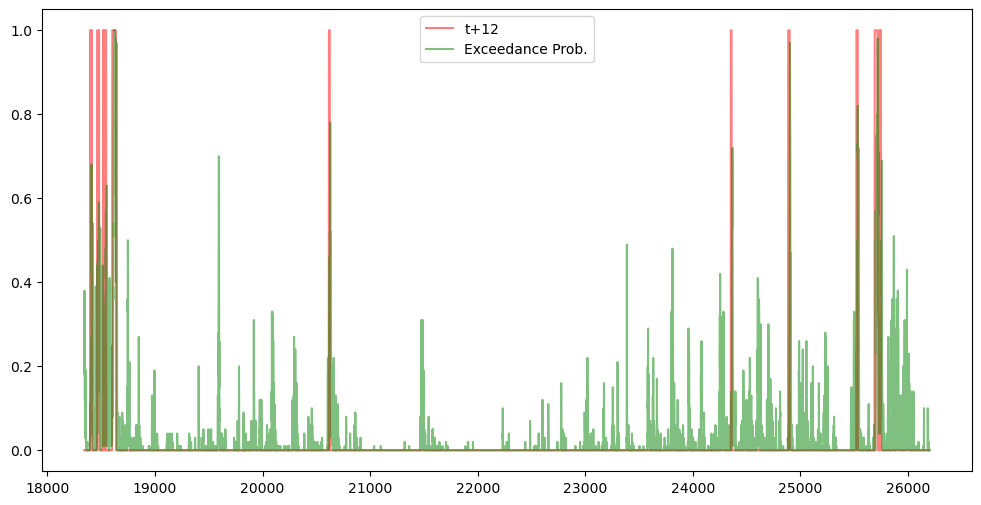

In [25]:
exceedance_prob = pd.Series(exceedance_prob, index=y_test_clf.index).rename('Exceedance Prob.')
ax = y_test_clf.plot(legend=True,color='red', figsize=(12,6), alpha=0.5)
exceedance_prob.plot(legend=True, color='green', alpha=0.5)

/home/dcm/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


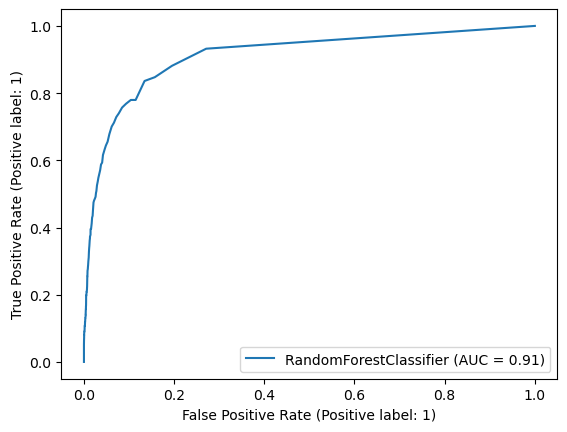

Signature:
roc_auc_score(
    y_true,
    y_score,
    *,
    average='macro',
    sample_weight=None,
    max_fpr=None,
    multi_class='raise',
    labels=None,
)
Docstring:
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from prediction scores.

Note: this implementation can be used with binary, multiclass and
multilabel classification, but some restrictions apply (see Parameters).

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
    True labels or binary label indicators. The binary and multiclass cases
    expect labels with shape (n_samples,) while the multilabel case expects
    binary label indicators with shape (n_samples, n_classes).

y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
    Target scores.

    * In the binary case, it corresponds to an array of shape
      `(n_samples,)`. Both probability estimates and non-thresholded
      dec

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
?roc_auc_score

plot_roc_curve(model, X_test, y_test_clf)

In [27]:

roc_auc_score(y_test_clf, exceedance_prob)

0.9113739165982877

In [28]:
from imblearn.ensemble import BalancedRandomForestClassifier

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
model = BalancedRandomForestClassifier()
model.fit(X_train, y_train_clf)

In [ ]:
forecasts_prob = model.predict_proba(X_test)
forecasts_prob

In [ ]:
roc_auc_score(y_test_clf, forecasts_prob[:,1])

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [ ]:
smote = SMOTE()
X_train_r, y_train_clf_r = smote.fit_resample(X_train, y_train_clf)

In [ ]:
smote_model = RandomForestClassifier()
smote_model.fit(X_train_r, y_train_clf_r)

In [ ]:
forecasts_prob_sm = smote_model.predict_proba(X_test)
forecasts_prob_sm

In [ ]:
roc_auc_score(y_test_clf, forecasts_prob_sm[:,1])